## Becoming a DataVizard exercise 

This is an exercise about data visualization, welcome! You will use common python libraries, Matplotlib and Seaborn to create effective and clear visualizations. You will work with two datasets: a dataset containing information about the top ten grossing movies in each year, and a dataset with information about the population in Swiss communes. 

These are the visualizations we will make, and that you will use to solve the exercise:
- [Histogram](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
- [Filled plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html)
- [Panels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
- [Log-log](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.loglog.html)

In the linked documentation, you will find complete information, and a lot more details compared to what is outlined in this notebook. We will make simple visualizations, but you will notice that all of the visualizations consider many optional parameters. You are encouraged to explore them, and modify them to make the most efficient visualizations, and match your desired style.

Beyond Matplotlib and Seaborn, there are many more resources that might be useful for you, for example:
- [ggplot](http://ggplot.yhathq.com/)
- [plotly](https://plotly.com/python/)
- [Geopy](https://geopy.readthedocs.io/en/stable/) and [Folium](https://python-visualization.github.io/folium/)

Create your custom signature colorpalettes:
- [coolors](https://coolors.co/)

In [39]:
# Let's load necessary libraries and the datasets
# "pip install seaborn" if necessary
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

PATH_IN = './data/'
fname_blockbusters = os.path.join(PATH_IN, 'blockbusters.csv')
fname_communes = os.path.join(PATH_IN, 'communes_pop.xls')

movies = pd.read_csv(fname_blockbusters)
movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

commune_pop = pd.read_excel(fname_communes, skiprows=5,skipfooter=7,
                            sheet_name='2017',names=['commune','population_Jan',
                                                     'birth_alive','death','natrual_increase',
                                                     'arrivals','departure','migratory_balance',
                                                     'divergence_statistic','population_Dec','variation_num',
                                                     'variation_ratio'])

pop_per_commune = commune_pop[[name.startswith('......') for name in commune_pop.commune]].copy()

### Note:
#### In case you have trouble opening the "communes_pop.xls" file, try installing an input library: "pip install openpyxl"

# 1. Tutorial: Using data visualization libraries

We will use the blockbusters dataset. Summary of the features:
- *Main_Genre*: the primary genre of the movie
- *Genre_2*
- *Genre_3*
- *imdb_rating*
- *length*: movie length in minutes
- *rank_in_year*: rank among the top 10 movies released that year
- *rating*: audience rating
- *studio*: the studio that produced the movie
- *title*: movie title
- *worldwide_gross*: total worldwide revenue in dollars
- *year*: year of release


## Visualizing a single variable

- First we will see how to visualize a single variable using matplotlib library. Let's focus on "Worldwide gross revenue" column of the dataframe and inspect the distribution, using histogram and boxplot.
- Notice the use of  plt.xlabel(), plt.ylabel(), plt.title() - every visualization should have axis labeled, and a title!
- plt.hist() takes a couple of important arguments: bins - the number of bins, and range - the range of values considered in the histogram.

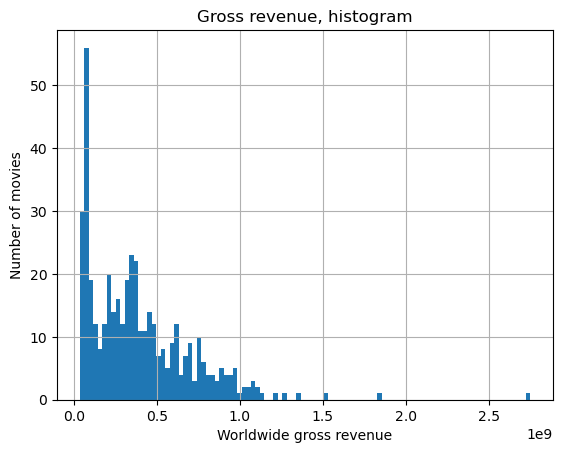

In [3]:
#we use pandas wrapper
movies['worldwide_gross'].hist(bins = 100)

#alternatively, we can use matplotlib directly
#plt.hist(movies['worldwide_gross'].values, bins = 100)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('Number of movies')
plt.title('Gross revenue, histogram');

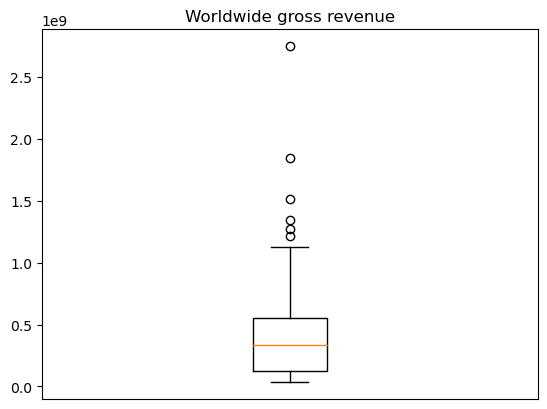

In [4]:
plt.boxplot(movies['worldwide_gross'])
plt.xticks([])
plt.title('Worldwide gross revenue');

## Visualizing two continuous variables

- Let's see if blockbusters with higher ratings also make more revenue!
- There are many ways how a relationship between two variables can be examined. The simplest one is a scatterplot, using plt.scatterplot().

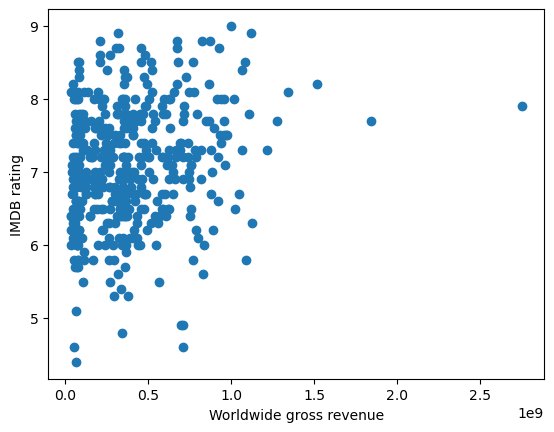

In [5]:
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'])

plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating');

- Visually examining the plot, how do you interpret the relationship between revenue and IMDB rating?
- Markers indicatig the datapoints seem too large, and we cannot get a sense of the distribution in the area of the plot where the markers are overlapping.
- We'll try to make the markers smaller by specifying a small "s" size parameter.

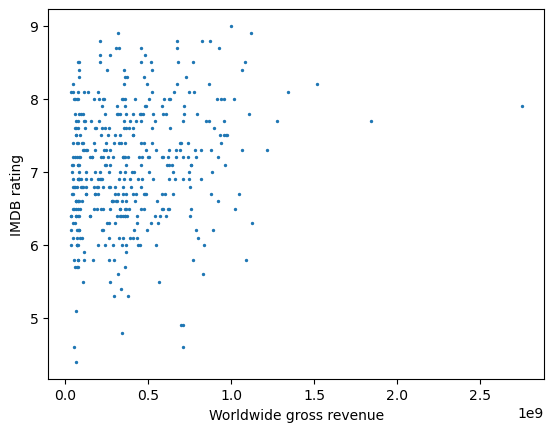

In [6]:
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'], s = 2)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating');

- Do you notice anything strange? What could be the reason?

Scatterplots are not useful when the number of datapoints is very large, as it becomes hard to interpret it. Seaborn library offers many alternative effective ways of visualizing join distributions. 

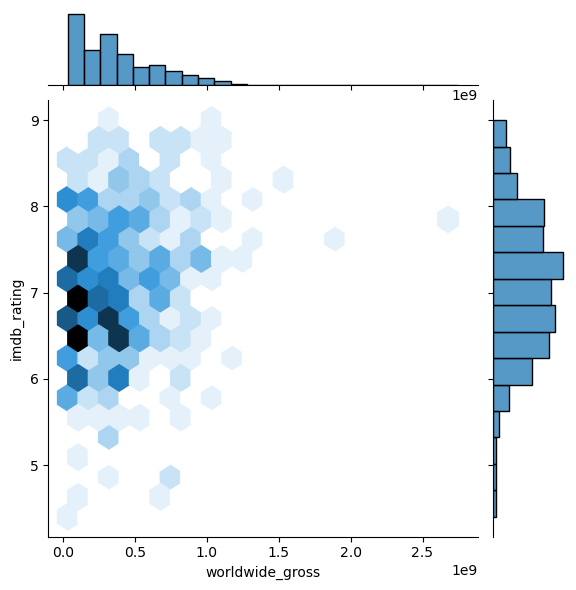

In [7]:
#sns.jointplot(x=movies['worldwide_gross'], y=movies['imdb_rating'], kind="hex")
sns.jointplot(data= movies, x='worldwide_gross', y='imdb_rating', kind="hex");

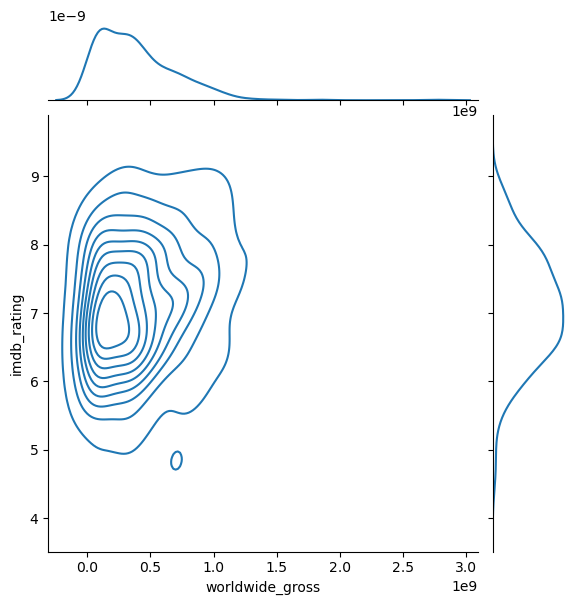

In [8]:
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="kde");

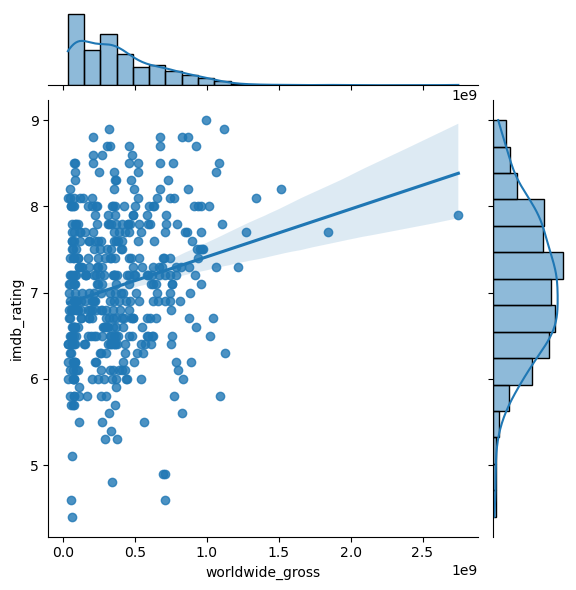

In [9]:
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="reg");

## Visualizing two variables, continuous and categorical

- Let's consider the five most prevalent genres, and examine the revenue.
- We'll show barplot (we get errorbars by default, how neat!), boxplot, and violinplot. Seaborn offers many more compelling visualizations. We will stop here, but see the gallery for more examples: https://seaborn.pydata.org/examples/index.html

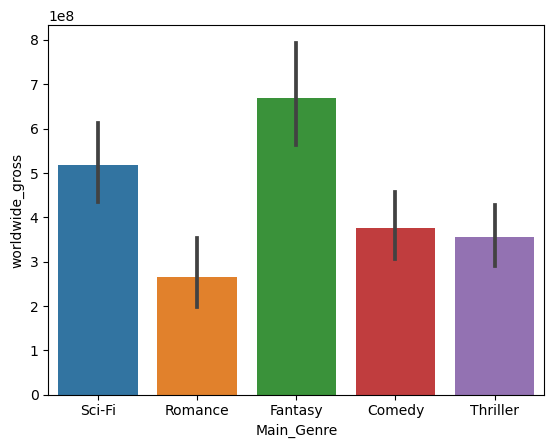

In [10]:
sns.barplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre']\
                        .isin(['Thriller','Comedy', 'Fantasy','Sci-Fi','Romance'])]);

By default, barplot also displays error bars to give an indication of the variability of the data.

In the context of Seaborn's barplot, the error bars represent the confidence interval around the estimate. The confidence interval provides a range of values, which is likely to contain the population parameter of interest.

By default:

1. The barplot function estimates the mean of the y variable for each category of the x variable.
2. The error bars represent the confidence interval for this estimate. This confidence interval gives a range within which the true population mean is likely to lie.
3. The default confidence interval is 95%, but you can modify it with the ci parameter.

The confidence intervals are computed using bootstrapping, which involves repeatedly sampling from the data (with replacement) and calculating the mean for each sample. The distribution of these means is then used to estimate the confidence interval. This method is beneficial when the data distribution is not assumed to be normal, as bootstrapping doesn't rely on such assumptions.

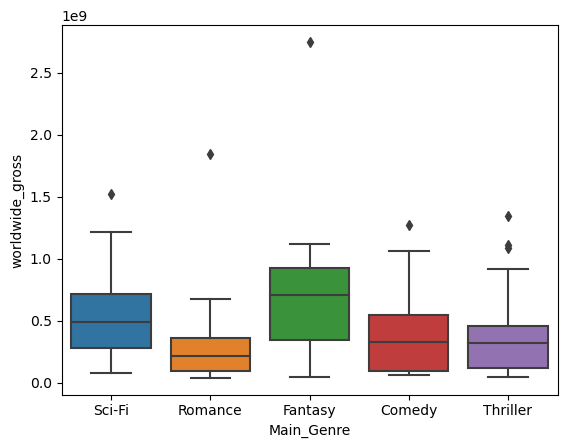

In [11]:
sns.boxplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])]);

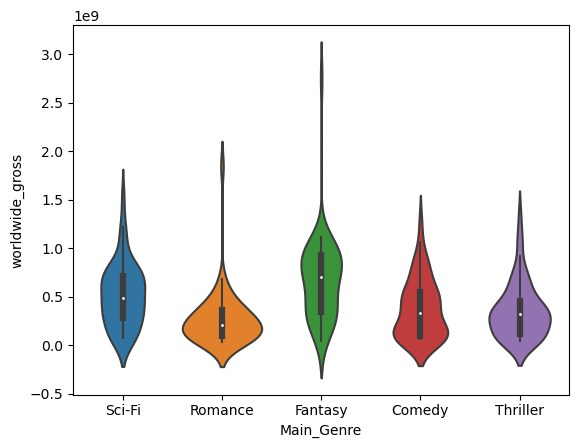

In [12]:
ax = sns.violinplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])

A violin plot is a method of plotting numeric data and can be understood as a combination of a box plot and a kernel density plot (a non-parametric way to estimate the probability density function). It provides a visualization of the distribution of the data, its probability density, and its cumulative distribution.

Here's a breakdown of its features:

1. Distribution of the Data: The width of the plot at different values indicates the density of the data at that value, with wider sections representing higher densities (more data points). This gives a good visual representation of the distribution of the data.

2. Box Plot Inside: Often, inside the violin plot, you'll find a miniature box plot representation that shows a summary of the data's central tendency and spread. The white dot represents the median of the data, and the thick bar in the center of the violin represents the interquartile range.

3. Symmetry: By default, violin plots are symmetrical, meaning the density is mirrored on both sides of the axis line, even if the data is not symmetric.

4. Comparison: Violin plots are especially useful when comparing multiple categories (in your case, different Main_Genre categories) to see both the distribution and central tendencies of the data in each category.

# 2. Exercises: Making more advanced visualizations


To make a good data visualization, we first need a clear idea of what we want to visualize! Do we aggregate the data, and how? What quantity should be on the different axis? How to use colors and item sizes? It often helps to sketch the visualization by hand before coding it up. By doing that, we can also give ourselves a moment to speculate what the visualization could look like under different hypotheses.

In the next three excercises, you are provided with descriptions and rough sketches of visualizations that are possibly useful to understand the movies dataset.


## 2.1 Visualizing uncertainty

- How did the average revenue of blockbusters evolve? Visualize the average yearly worldwide gross revenue, together with the standard deviation. Below, you are provided with two rough sketches of how the visualization could look like. We could indicate the margin of error with lines with caps, or by contouring between the upper and lower bound.

- Hints: use Matplotlib errorbar and fill_between functions.

- Did the average revenue increase/decrease over time? What do you observe?


<img src="figure0.jpg" style="width: 400px;" align="left" />
<img src="figure1.jpg" style="width: 400px;" align="left"/>


<br>


In [13]:
# Calculate yearly stats across movies

stats_by_year = movies.groupby(movies['year']).apply(lambda x: pd.Series({
        'average_worldwide_gross': x['worldwide_gross'].mean(),
        'std_dev_worldwide_gross': x['worldwide_gross'].std()
    }))

stats_by_year.head()

,average_worldwide_gross,std_dev_worldwide_gross
year,,
1975,4.096674e+07,6.449858e+06
1976,6.642076e+07,2.287164e+07
1977,9.808576e+07,8.039820e+07
1978,8.944416e+07,3.714570e+07
1979,8.086015e+07,1.129196e+07


### Explanation of the GroupBy Operation with Lambda

**Objective:**  
The code aims to group the `movies` dataframe by the `year` column and then compute both the average and standard deviation of `worldwide_gross` for each respective year.

**`groupby()` Function:**  
With the code `movies.groupby(movies['year'])`, the `movies` dataframe is grouped by the unique entries in the `year` column. This results in groups of rows where each group corresponds to movies from the same year.

**Using `apply()` with a `lambda` Function:**  
After grouping by year, the `apply()` function is employed to execute a specific operation on each group. This operation is encapsulated by the lambda function: `lambda x: pd.Series({'average_worldwide_gross': x['worldwide_gross'].mean(),'std_dev_worldwide_gross': x['worldwide_gross'].std()})`. Here, `x` is a subset of the `movies` dataframe for a particular year. The function then calculates both the average and standard deviation of the `worldwide_gross` column for the movies of that year. The computed values are structured into a new `pd.Series`.

**Result:**  
The resulting dataframe, named `stats_by_year`, will feature:
- Rows indexed by unique years from the `movies` dataframe.
- Two columns:
    1. `average_worldwide_gross`: The average `worldwide_gross` for movies from that year.
    2. `std_dev_worldwide_gross`: The standard deviation of `worldwide_gross` for movies from that year.


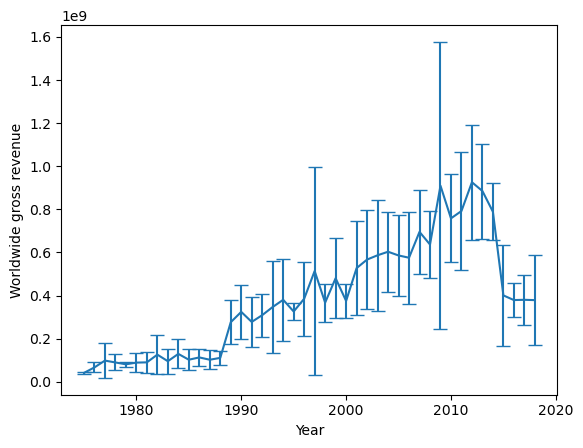

In [14]:
# Plot with errorbars
plt.errorbar(x = stats_by_year.index,
             y = stats_by_year['average_worldwide_gross'],
             yerr = stats_by_year['std_dev_worldwide_gross'],
             capsize=5)
plt.xlabel('Year')
plt.ylabel('Worldwide gross revenue');

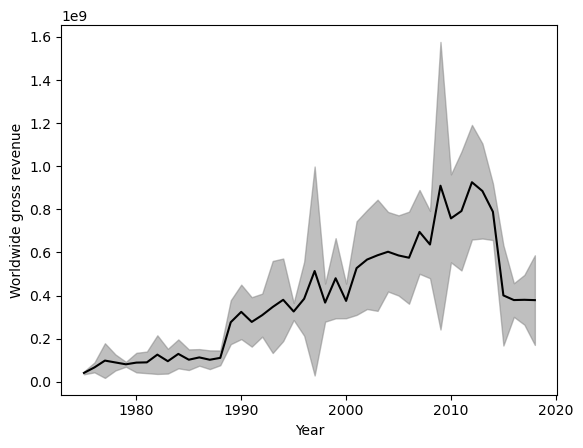

In [15]:
# Write your code to make filled plot here
plt.fill_between(stats_by_year.index, 
                 stats_by_year['average_worldwide_gross']+stats_by_year['std_dev_worldwide_gross'], 
                 stats_by_year['average_worldwide_gross']-stats_by_year['std_dev_worldwide_gross'], 
                 color = 'grey', 
                 alpha = 0.5)
plt.plot(stats_by_year['average_worldwide_gross'], color='k')
plt.xlabel('Year')
plt.ylabel('Worldwide gross revenue');

## 2.2 Creating panels

- Next, we want to understand how long the blockbusters are in the different genres. When working with a large number of categories (we have 16 genres in the movies dataset), the visualizations easily become cluttered, and it becomes useful to make panels with small subplots.

- Make a 4x4 panel for the 16 genres. In each subplot, show a histogram with the distribution of movie lengths for different categories. Below, find a skets of how this visualization could look like. Note the same x- and y-scale that allows comparison between categories!

- Hints: use Matplotlib subplots function to initialize the subplotting axes.

- What genres do the longest movies belong too? What can you say about the length of Comedy and animation movies?

- How could we assign different color to each subplot (each genre)? What type of palette would be the best choice? Make a variation of the visualzation where each genre is visualized in a different color.

<img src="figure3.jpg" style="width: 500px;" align="left">

In [16]:
# Calculate stats by genre here
length_by_genre = movies.groupby('Main_Genre').apply(lambda x: pd.Series({'length': x['length'].values}))
length_by_genre.head()

,length
Main_Genre,
Action,"[135, 156, 129, 119, 147, 118, 135, 112, 152, ..."
Adventure,"[146, 122, 106, 139, 140, 127, 163, 121, 127, ..."
Animation,"[118, 90, 100, 90, 108, 108, 94, 91, 98, 91, 1..."
Comedy,"[102, 104, 88, 93, 102, 103, 106, 103, 93, 96,..."
Crime,"[128, 120, 147, 133, 128, 130, 111, 104, 85, 1..."


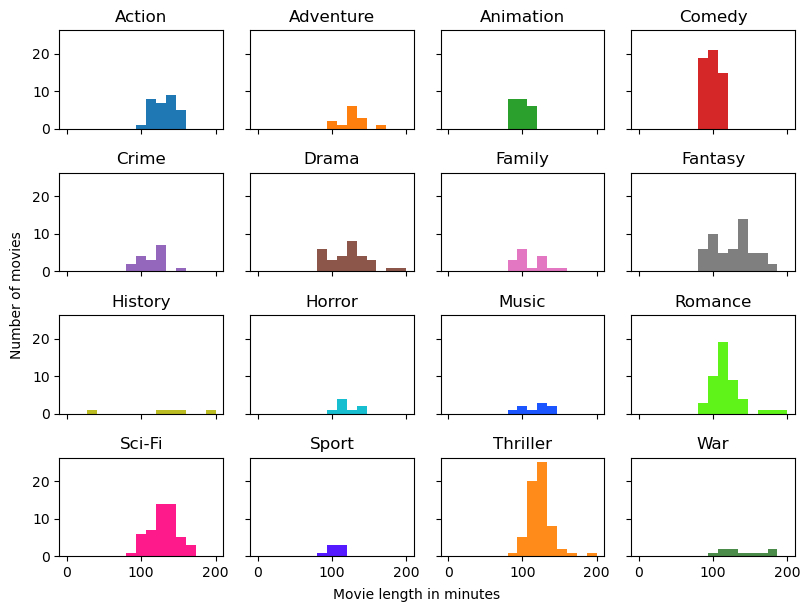

In [17]:
fig, axes = plt.subplots(4, 4, figsize=(8, 6), sharex=True, sharey=True)

colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf', '#1a55FF', '#5FF31a',
    '#FF1a8c', '#551aFF', '#FF8c1a', '#4c8c4b'
]

# Flatten the 2D array of Axes to iterate over individual Axes
for i, ax in enumerate(axes.ravel()):
    ax.hist(length_by_genre['length'].iloc[i], range = [0,200], bins=15, color=colors[i])
    ax.set_title(length_by_genre.index[i])
    
plt.tight_layout()
fig.text(0.5, 0, 'Movie length in minutes', ha='center', va='center')
fig.text(0,0.5, "Number of movies", ha='center', va='center', rotation = 90);

In [18]:
# Write your interpretation here

## 2.3 Heatmaps

- What studios make blockbusters in which genre? 

- There are many studios and many genres. When working with two variables that both have many different categories, there is often no space for representing each combination of two categories with a detailed plot (such as barplot of boxplot). It becomes useful to represent each stratum with one number, indicated with color in a heatmap. Such visualizations are useful to quickly understand the data.

- Visualize the number of blockbusters made by each studio, of each genre. You will find below a rough sketch. Hint: use Seaborn heatmap function. 

- Finally, with a heatmap we can represent three variables, by coding a third variable with color. Try to understand what is the relationship between genres by understanding the co-occurence patterns between the main and secondary genre. What is the average worldwide gross revenue for movies with different combinations of main and second genre?

- You should be able to easily answer the following questions from the two visualizations: What genres do the majority of movies made by Warner Bros studio fall into? What is the most successful genre of Walt Disney pictures movies? What studio made the largest number of Romance blockbusters? Which combination of genres brings the highest revenue?



<img src="figure4.jpg" style="width: 500px;" align="left">

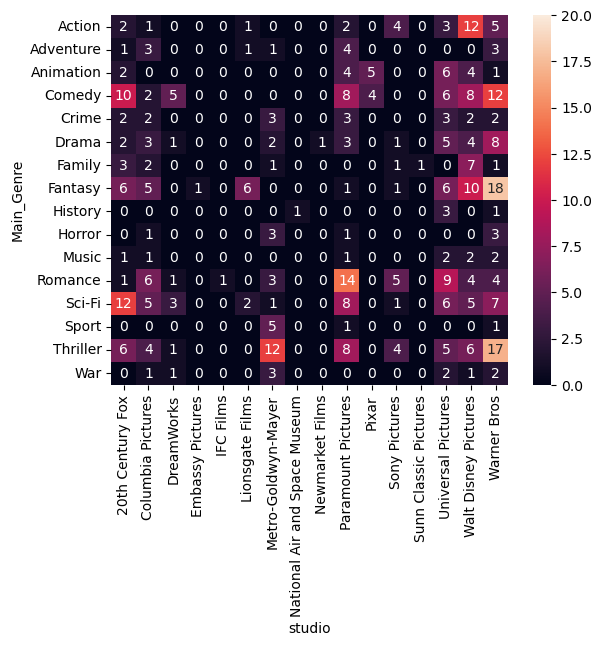

In [19]:
crosstab1 = pd.crosstab(movies['Main_Genre'], movies['studio'])
sns.heatmap(crosstab1, annot=True, vmin=0, vmax=20);

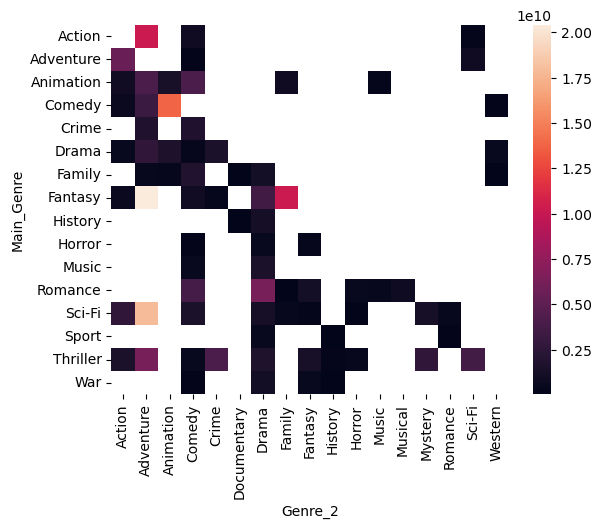

In [20]:
crosstab2 = pd.crosstab(movies['Main_Genre'], movies['Genre_2'], values=movies['worldwide_gross'], aggfunc='sum', margins=False)

sns.heatmap(crosstab2, annot=False);

If you were to set `margins=True`, the resulting crosstab table would have an additional row labeled "All" at the bottom, and an additional column labeled "All" at the right. These would show the respective totals. In short, the `margins` argument provides a quick way to get summaries along the rows and columns in the crosstab table.

## 2.4 Be a show-off

Finally, we did not explore the impact of the rank of the movie among the top ten. How is the rank among the top ten related to the genres? What kind of visualization can be suitable to understand this better? To practice your data viz skills, sketch a potential visualization on a piece of paper, and then implement it using the appropriate type of visualization.

In [21]:
# Melting the dataframe to long format to consider all genre columns
df_melted = movies.melt(id_vars=['rank_in_year', 'title'], 
                        value_vars=['Main_Genre', 'Genre_2', 'Genre_3'], 
                        var_name='Genre_Type', 
                        value_name='Genre')

# Grouping by rank_in_year and Genre to get counts
genre_rank_counts = df_melted.groupby(['rank_in_year', 'Genre']).size().unstack().fillna(0)

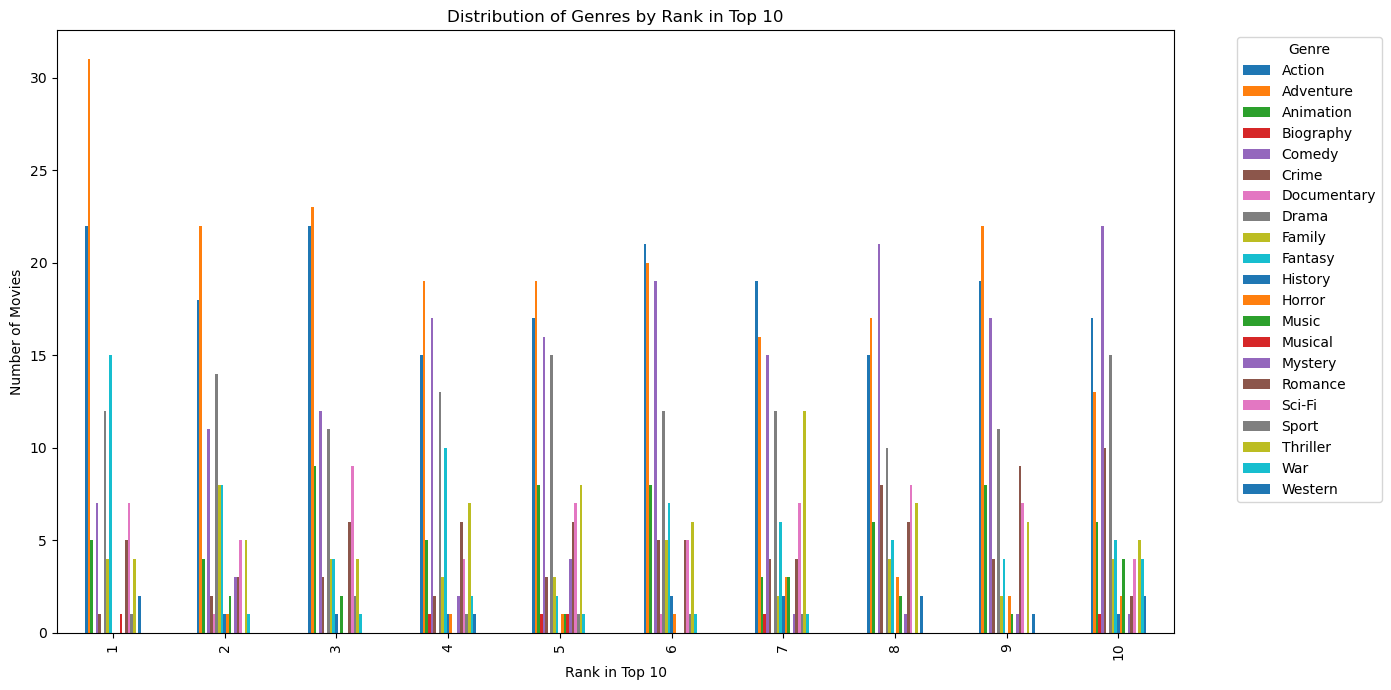

In [22]:
genre_rank_counts.plot(kind='bar', figsize=(14, 7))
plt.title('Distribution of Genres by Rank in Top 10')
plt.ylabel('Number of Movies')
plt.xlabel('Rank in Top 10')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

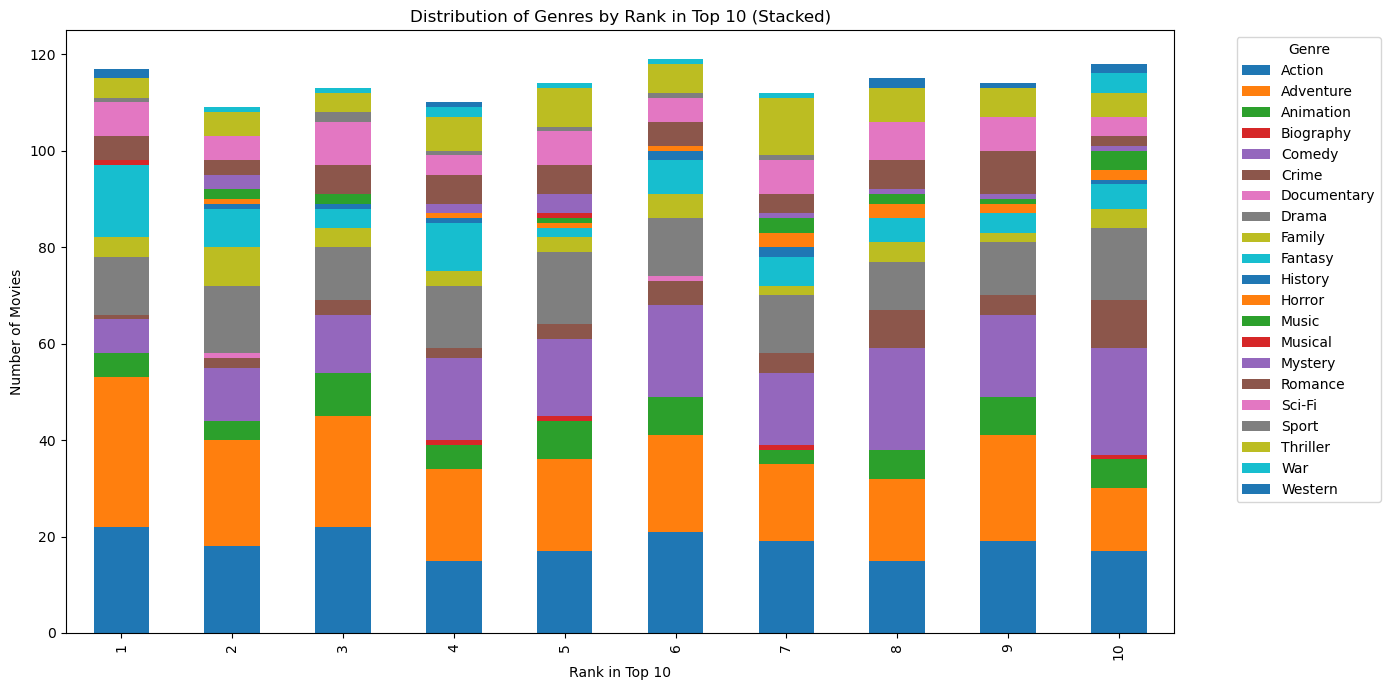

In [23]:
genre_rank_counts.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Distribution of Genres by Rank in Top 10 (Stacked)')
plt.ylabel('Number of Movies')
plt.xlabel('Rank in Top 10')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
genre_rank_medians = df_melted.groupby('Genre')['rank_in_year'].median().sort_values()
genre_counts = df_melted['Genre'].value_counts()

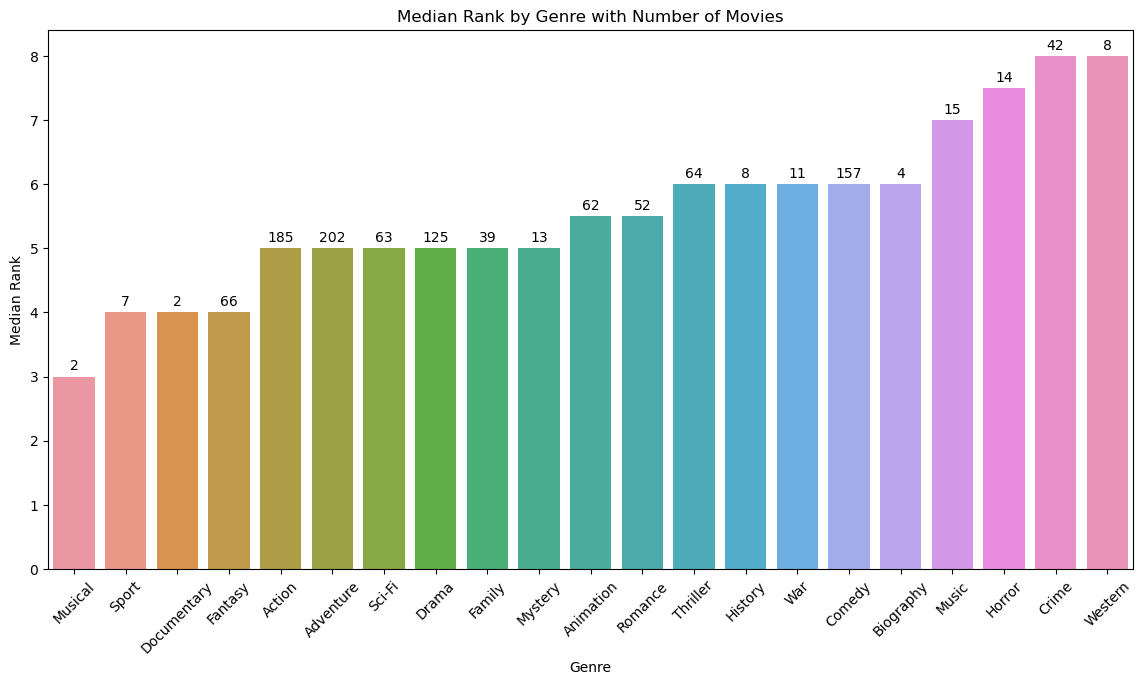

In [25]:
plt.figure(figsize=(14,7))

# Creating the bar plot
ax = sns.barplot(x=genre_rank_medians.index, y=genre_rank_medians.values, order=genre_rank_medians.index)

# Annotating the bars with the count of movies for each genre
for idx, label in enumerate(ax.get_xticklabels()):
    genre = label.get_text()
    count = genre_counts[genre]
    ax.text(idx, genre_rank_medians[genre] + 0.1, count, ha="center")

plt.xticks(rotation=45)
plt.ylabel('Median Rank')
plt.xlabel('Genre')
plt.title('Median Rank by Genre with Number of Movies')
plt.show()

## Part 3: Visualizing skewed distributions

__3.A__ Familiarize yourself with the "pop_per_commune" dataframe, that contains information about each commune, and its population. Plot a histogram of the population counts (population_Dec) and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

In [40]:
pop_per_commune['commune'] = pop_per_commune['commune'].str.replace(r'^[.0-9]+\s+', '', regex=True)
pop_per_commune.head()

,commune,population_Jan,birth_alive,death,natrual_increase,arrivals,departure,migratory_balance,divergence_statistic,population_Dec,variation_num,variation_ratio
3,Aeugst am Albis,1977,10,7,3,129,165,-36,-3,1941,-36,-1.820941
4,Affoltern am Albis,11900,128,93,35,1239,1029,210,1,12146,246,2.067227
5,Bonstetten,5435,47,25,22,374,322,52,3,5512,77,1.416743
6,Hausen am Albis,3571,27,20,7,298,217,81,5,3664,93,2.604313
7,Hedingen,3687,31,20,11,224,231,-7,3,3694,7,0.189856


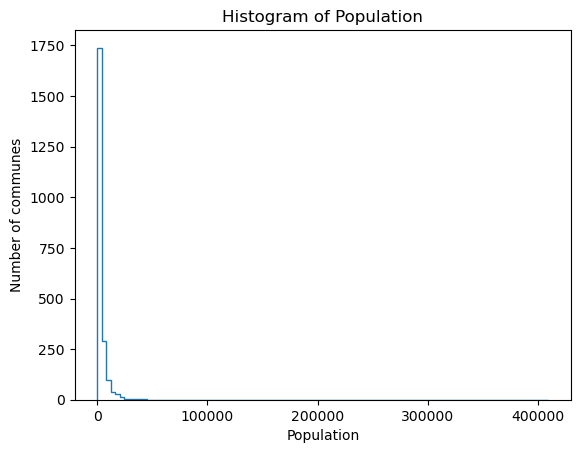

In [61]:
plt.hist(pop_per_commune['population_Dec'], bins=100, histtype='step')
plt.title('Histogram of Population')
plt.ylabel('Number of communes')
plt.xlabel('Population');



__3.B__ The figure below represents 4 types of histogram. At this stage, your distribution should look like Fig.(a). A common way to represent [power-laws](https://en.wikipedia.org/wiki/Power_law) is to use a histogram using a log-log scale  -- remember: the x-axis of an histogram is segmented in bins of equal sizes and y-values are the average of each bin. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as shown in Fig.(d), in which the y-axis represents the number of data points with values greater than y. Create the figures (b) and (d) using the data extracted for task 1A. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?

<img src="plaw.png" style="width: 600px;" align="left">
  
The figure is extracted from [this paper](https://arxiv.org/pdf/cond-mat/0412004.pdf) that contains more information about this family of distributions.

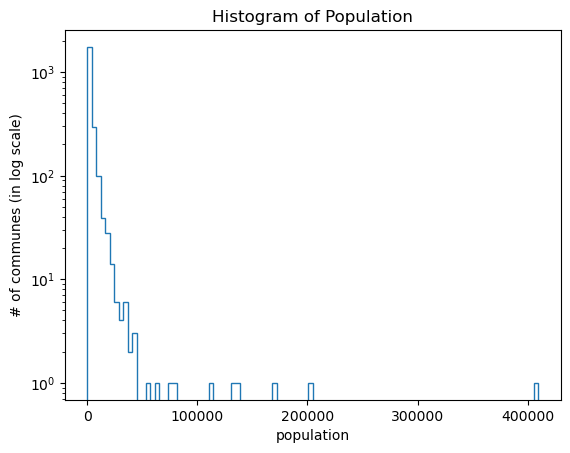

In [65]:
array_100 = plt.hist(pop_per_commune.population_Dec,bins=100,log=True,histtype='step')
plt.title('Histogram of Population')
plt.ylabel('# of communes (in log scale)')
plt.xlabel('population');

`log=True`: This makes the y-axis logarithmic, which can make it easier to visualize data that spans several orders of magnitude. In this context, it helps in visualizing the number of cantons even if there's a wide disparity in their counts.

`array_100` is a tuple containing the values of the histogram, the bin edges, and the patches used. Storing this is optional and depends on if you'd like to use this information later in your code.

In [66]:
array_100

(array([1.739e+03, 2.910e+02, 9.800e+01, 3.900e+01, 2.800e+01, 1.400e+01,
        6.000e+00, 4.000e+00, 6.000e+00, 2.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

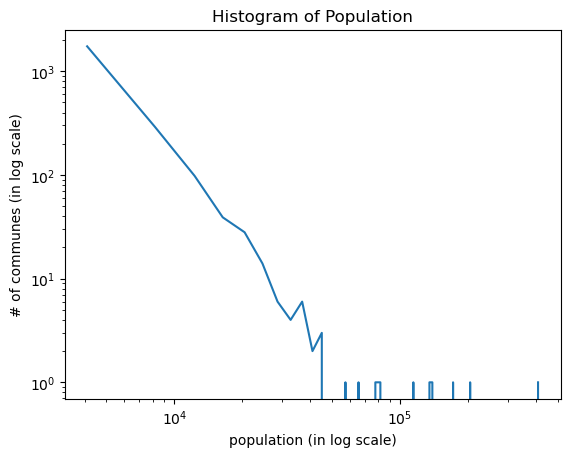

In [67]:
plt.loglog(array_100[1][1:],array_100[0])
plt.title('Histogram of Population')
plt.ylabel('# of communes (in log scale)')
plt.xlabel('population (in log scale)');

`[1]` is accessing the second element of this output, which represents the bin edges of the histogram. `[1:]` is a slicing operation that omits the first bin edge. This is done to make the lengths of x and y data compatible.


`array_100[0]`: This accesses the first element of the output, which represents the values of the histogram, i.e., the number of occurrences (or counts) in each bin.

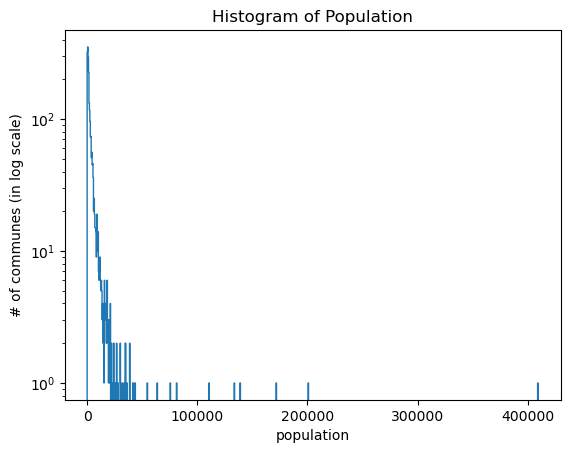

In [68]:
array_1000 = plt.hist(pop_per_commune.population_Dec,bins=1000,log=True,histtype='step')
plt.title('Histogram of Population')
plt.ylabel('# of communes (in log scale)')
plt.xlabel('population')
plt.show()

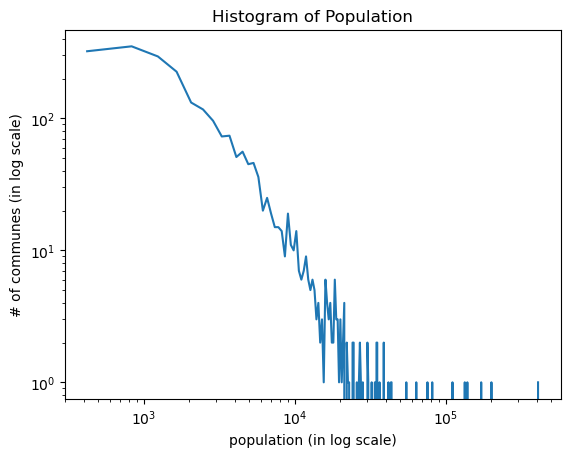

In [69]:
plt.loglog(array_1000[1][1:],array_1000[0])
plt.title('Histogram of Population')
plt.ylabel('# of communes (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()

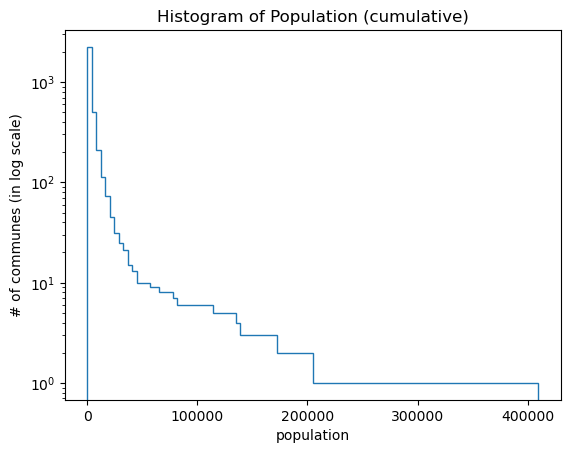

In [73]:
array_cumulative=plt.hist(pop_per_commune.population_Dec,bins=100,log=True,cumulative=-1,histtype='step')
plt.title('Histogram of Population (cumulative)')
plt.ylabel('# of communes (in log scale)')
plt.xlabel('population')
plt.show()

`cumulative=-1`: This is the interesting part. Typically, the cumulative parameter when set to True would create a standard cumulative histogram where each bin gives the count of observations up to and including that bin's maximum value. By setting it to -1, we get the opposite: it creates a reversed cumulative histogram, counting down from the total number of observations. Essentially, each bin now shows the count of observations from that bin's maximum value to the maximum value of the entire dataset.

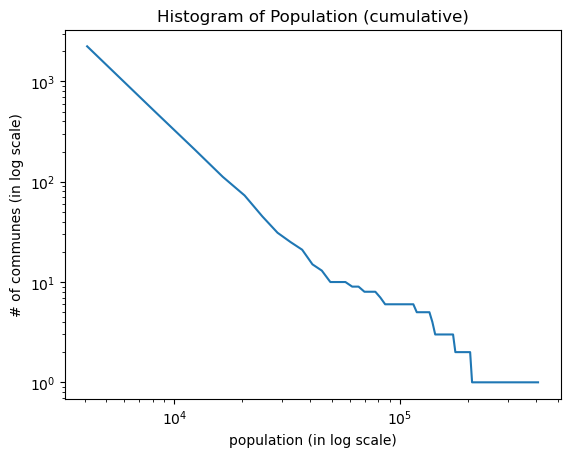

In [71]:
plt.loglog(array_cumulative[1][1:],array_cumulative[0])
plt.title('Histogram of Population (cumulative)')
plt.ylabel('# of communes (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()